<a href="https://colab.research.google.com/github/AmanPriyanshu/Spiking-Neural-Networks/blob/main/spike_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spiking Neural Networks - 1:

The difference between an ordinary artificial neural network (ANN) and SNN is that, a SNN's neuron only activates/spikes upon crossing a threshold value. The most common model for simulating or exhibiting such spikes are integerate&fire or leaky integerate&fire. More powerful than traditional machine learning techniques, it is rare to see such powerful implementation not widespread in the booming ML/AI world. However, an important reason for such an effect, is the inability to differentiate such spiking or binary functions. In essence, it is our incapacity to train in a supervised fashion such a model with efficient learning progress. Therefore, it has seen rare use cases, and can only be trained using unsupervised learning methods.

## Installation:

`pip install brian2`

In [1]:
!pip install brian2

## Imports:

In [2]:
from brian2 import *
import matplotlib.pyplot as plt
%matplotlib inline

## Units:

In [3]:
20*volt

20. * volt

In [4]:
20*amp

20. * amp

In [5]:
1000*namp

1. * uamp

In [6]:
10*nA

10. * namp

In [7]:
(10*nA)*(5*mohm)

50. * pvolt

In [8]:
5*ohm

5. * ohm

## Defining a Neuron:

In [9]:
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

In [10]:
G = NeuronGroup(1, eqs)
G

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup')

### Running a simulation:

In [11]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
run(100*ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'exact' (took 0.03s). [brian2.stateupdaters.base.method_choice]


In [12]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

Before v = 0.0
After v = 0.9999546000702376


As, tau = 10ms and run limit = 100ms, therefore, t = \[0ms, 100ms\].

Now, looking at our differential equation, 
```
dv/dt = (1-v)/tau
```

thus, v = 1 - e^(-t/tau).

Going through with the limits at the two ends, we get v=0 @ t=0 and v=~1 @ t=100ms

In [13]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))

Expected value of v = 0.9999546000702375


## Plotting our simulation:

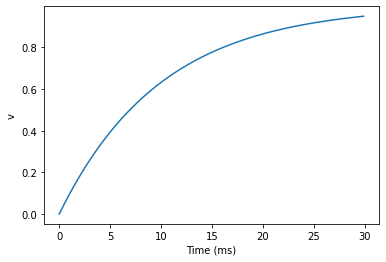

In [14]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

### Theoretical v/s Simulations:

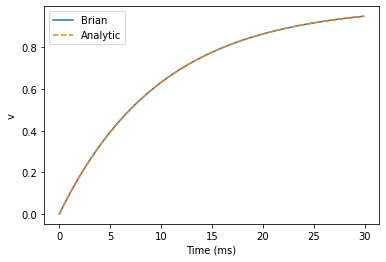

In [15]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0)

run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian')
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--',label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend();

## Simulation 2:

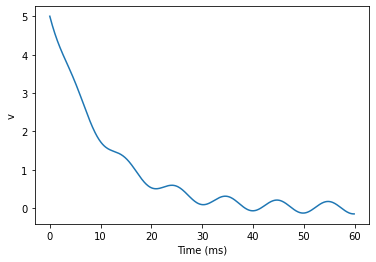

In [16]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''

G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0)

G.v = 5 # initial value

run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

## Simulation 3: Spikes

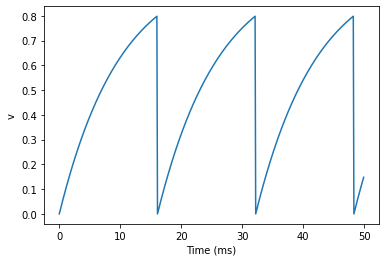

In [17]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [18]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)

run(50*ms)

print('Spike times: %s' % spikemon.t[:])

Spike times: [16.  32.1 48.2] ms


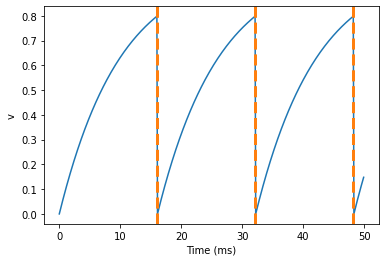

In [19]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

## Refractory:

This means that after the neuron fires a spike it becomes refractory for a certain duration and cannot fire another spike until this period is over.

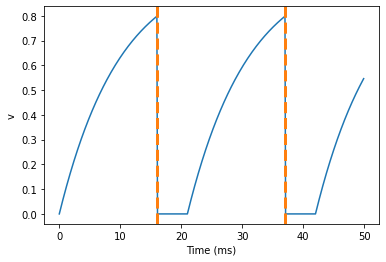

In [20]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

Spike times: [ 8. 23. 38.] ms


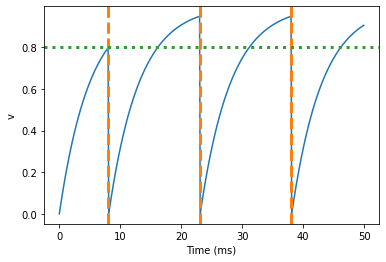

In [21]:
start_scope()

tau = 5*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=15*ms, method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
axhline(0.8, ls=':', c='C2', lw=3)
xlabel('Time (ms)')
ylabel('v')
print("Spike times: %s" % spikemon.t[:])

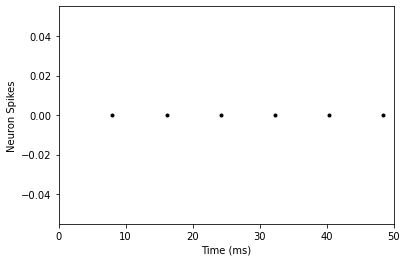

In [22]:
start_scope()

tau = 5*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')
xlim([0, 50])
xlabel('Time (ms)')
ylabel('Neuron Spikes');

### Multiple Neurons

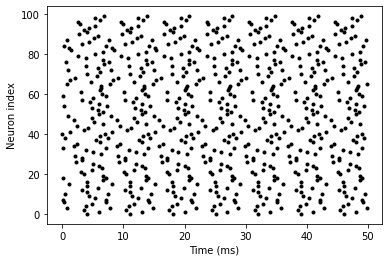

In [23]:
start_scope()

N = 100
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()'

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');

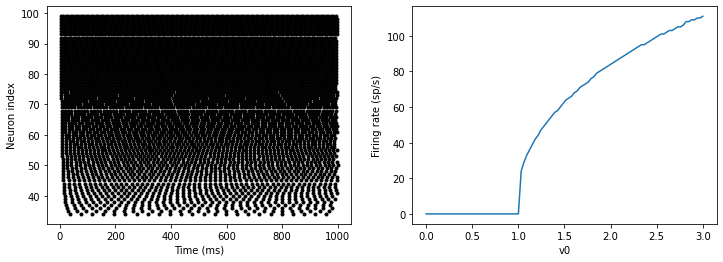

In [24]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms

eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

## Modelling Noise:

by introducing xi

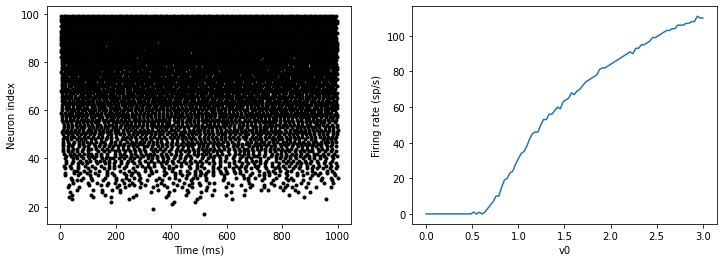

In [25]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');